In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water.csv')

In [3]:
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

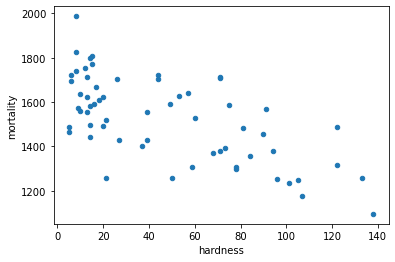

In [4]:
df.plot(kind='scatter', x='hardness', y='mortality')

In [5]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [6]:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X = df[['hardness']]
y = df['mortality']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
X_train.shape

(42, 1)

In [11]:
y_train.shape

(42,)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
model.coef_

array([-3.13167087])

In [14]:
model.intercept_

1668.9722977277095

In [15]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [16]:
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,hardness,y_pred,y_test
0,105,1340.146856,1247
5,10,1637.655589,1558
46,14,1625.128906,1495
31,44,1531.178779,1702
13,78,1424.701970,1307
55,20,1606.338880,1625
34,133,1252.460072,1259
49,75,1434.096982,1587
12,21,1603.207209,1519
40,6,1650.182272,1696


In [17]:
model.score(X_test, y_test)

0.5046490611017092

In [18]:
y_rem = y_test - y_pred

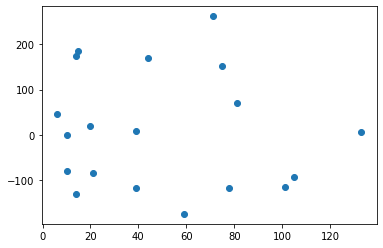

In [19]:
plt.scatter(X_test, y_rem)

Корреляция между жесткостью воды и средней годовой смертностью есть, т.к. она проглядывается на графике, при этом к-ты Пирсона и Спирмена по модулю ближе к единице, чем к нулю (- обозначает, что зависимость обратная). Модель можно считать рабочей. К-т детерминации -- примерно 0.5, что уже неплохо, но говорит о том, что вряд ли на смертность влияет только жесткость воды. Полученное нормальное распределение на графике остатков говорит о том, что модель адекватна

Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [20]:
df_South = df.loc[df.location == 'South']
df_North = df.loc[df.location == 'North']

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

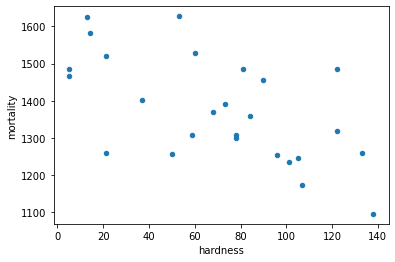

In [21]:
df_South.plot(kind='scatter', x='hardness', y='mortality')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

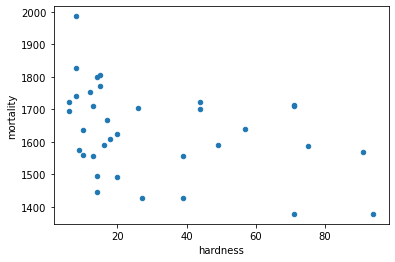

In [22]:
df_North.plot(kind='scatter', x='hardness', y='mortality')

In [23]:
df_South[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [24]:
df_North[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [25]:
df_South[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [26]:
df_North[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


South

In [27]:
X = df_South[['hardness']]
y = df_South['mortality']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
X_train.shape

(18, 1)

In [30]:
y_train.shape

(18,)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
model.coef_

array([-3.51342921])

In [33]:
model.intercept_

1640.2204603423374

In [34]:
y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [35]:
model.score(X_test, y_test)

-2.551922301235205

In [36]:
y_rem = y_test - y_pred

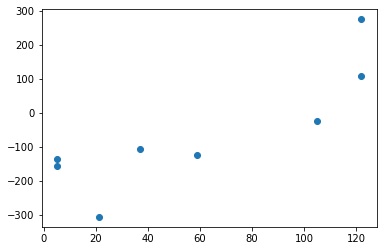

In [37]:
plt.scatter(X_test, y_rem)

North

In [38]:
X = df_North[['hardness']]
y = df_North['mortality']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [40]:
X_train.shape

(24, 1)

In [41]:
y_train.shape

(24,)

In [42]:
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [43]:
model.coef_

array([-1.97686226])

In [44]:
model.intercept_

1688.150229031281

In [45]:
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [46]:
model.score(X_test, y_test)

0.018885304285745863

In [47]:
y_rem = y_test - y_pred

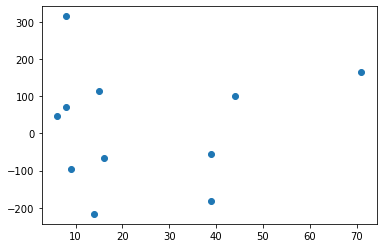

In [48]:
plt.scatter(X_test, y_rem)

Корреляция между жесткостью воды и средней годовой смертностью на севере не наблюдается и не проглядывается на графике, а также к-ты Пирсона и Спирмена по модулю ближе к нулю.  К-т детерминации очень мал, что говорит о том, скорее всего на смертность не влияет жесткость воды. 

Несмотря на неплохие к-ты Пирсона и Спирмена в случае юга к-т детерминации отрицательный, что говорит о том, что модель крайне неадекватна

In [ ]:
Стоит обратить внимание, что по-отдельности данных для юга и севера мало, и поэтому нельзя 